# TensorFlow Demo: MNIST for ML Beginners
See [TensorFlow Tutorial](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html) for details.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.04.53%20PM.png)

# Recognizing a hand-written text with single neuron

Let's see how single neuron can recognize a hand-written text.

## The gray scale image = Float values from 0.0 (white) to 1.0 (black)

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.06.25%20PM.png)

## Put the 784 values into single neuron

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.08.38%20PM.png)

# Loading MNIST training data

Let's try training the neuron.

In [88]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Training Images

![mnist.train.xs](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.17.39%20AM.png)

In [89]:
# check MNIST training images matrix shape
mnist.train.images.shape

(55000, 784)

In [90]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)
sample_img

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

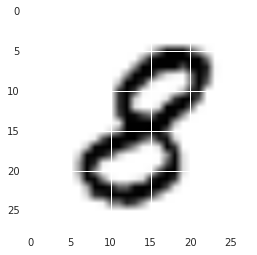

In [91]:
# plot the image
plt.imshow(sample_img).set_cmap('Greys')

## Training Labels

We also need the labels for each image to train the model.

![mnist.train.ys](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.21.20%20AM.png)

In [92]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [93]:
# show MNIST label data
sample_label = mnist.train.labels[5]
sample_label

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

# Defining a Neural Network

Let's define a single layer neural network, with single neuron for recognizing each digit.


## in a graph:
![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.26%20AM.png)

## in a vector equation:

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.40%20AM.png)

$${\Huge y=softmax(Wx + b)}$$

## in TensorFlow

In [94]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784]) # a placeholder for inputting the image 
W = tf.Variable(tf.zeros([784, 10])) # weights
b = tf.Variable(tf.zeros([10])) # biases
y = tf.nn.softmax(tf.matmul(x, W) + b)

## What is Softmax?

Softmax converts an array of values into an array of **probabilities** (0 - 1.0).

$${\Huge softmax(n) = \frac{\exp n_i}{\sum \exp n_i}}$$


<Container object of 10 artists>

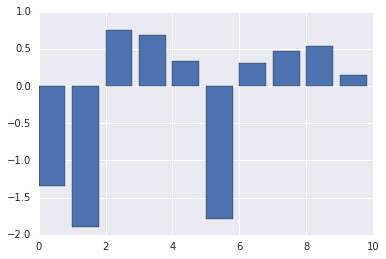

In [108]:
import numpy as np
import matplotlib.pyplot as plt
i = np.arange(0, 10)
n = np.random.randn(10)
plt.bar(i, n)

1.0000000000000002

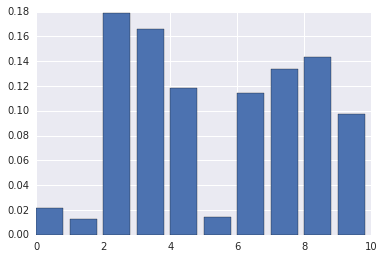

In [109]:
def softmax(n):
  return np.exp(n) / np.sum(np.exp(n))

s = softmax(n)
plt.bar(i, s)
np.sum(s)

# Defining the Train Step

In [106]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10]) # the training labels
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

## What is Cross Entropy?

Cross Entropy returns **higher value for wrong answers, low value for correct answers**. Enables faster training.

$${\Huge cross\_entropy (x, y) = - \sum   y_{i}  log(x_{i})}$$


<Container object of 10 artists>

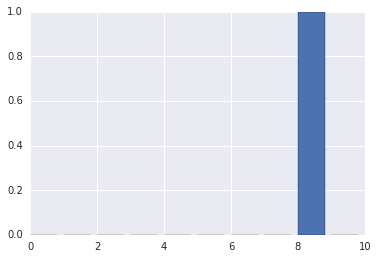

In [110]:
# label
label = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
plt.bar(i, labels)

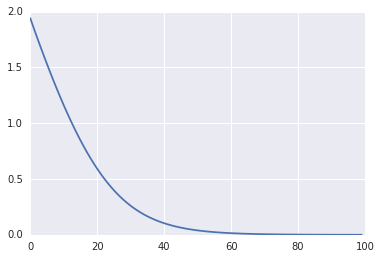

In [111]:
def cross_entropy(values, labels):
  return -np.sum(labels * np.log(values))

# simulate the training
x_ents = []
for i in range(0, 100):
  x_ents.append(cross_entropy(softmax(n), label))
  n[8] += 0.1
plt.plot(x_ents)

## Use Gradient Decent to find the optimal weights
![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.13.57%20AM.png)

# Training with mini batch

In [112]:
# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

## The trained weights look like this:
blue: positive weights, red: negative weights

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.14%20AM.png)

# Test

In [113]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9023


# Visualizing with TensorBoard

See [TensorBoard tutorial](https://www.tensorflow.org/versions/master/how_tos/summaries_and_tensorboard/index.html) for details.

![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)